In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\user\Desktop\tbrain_cc_training_48tags_hash_final.csv")

In [3]:
alot = data.loc[data['txn_cnt']!=0].loc[data['txn_amt']/data['txn_cnt'] >= 1000000]
clean_data = data.drop(index = alot.index.tolist())

In [4]:
clean_data['gender_code'] = clean_data['gender_code'].fillna(2)
clean_data['age'] = clean_data['age'].fillna(3.5)
clean_data['trdtp'] = clean_data['trdtp'].fillna(15)
clean_data['slam'] = clean_data['slam'].fillna(clean_data['slam'].median())
clean_data['educd'] = clean_data['educd'].fillna(10)
clean_data['masts'] = clean_data['masts'].fillna(2)
clean_data['naty'] = clean_data['naty'].fillna(1)
clean_data['poscd'] = clean_data['poscd'].fillna(2)
clean_data['cuorg'] = clean_data['cuorg'].fillna(30)

In [5]:
clean_data = clean_data.astype({'domestic_offline_amt_pct':'float32','domestic_online_amt_pct':'float32','overseas_offline_amt_pct':'float32',
 'overseas_online_amt_pct':'float32','domestic_offline_cnt':'int16','domestic_online_cnt':'int16','overseas_offline_cnt':'int16','overseas_online_cnt':'int16','card_1_txn_cnt':'int16',  
 'card_2_txn_cnt':'int16','card_3_txn_cnt':'int16','card_4_txn_cnt':'int16','card_5_txn_cnt':'int16','card_6_txn_cnt':'int16','card_7_txn_cnt':'int16','card_8_txn_cnt':'int16',  
 'card_9_txn_cnt':'int16','card_10_txn_cnt':'int16','card_11_txn_cnt':'int16','card_12_txn_cnt':'int16','card_13_txn_cnt':'int16','card_14_txn_cnt':'int16','card_other_txn_cnt':'int16'    }) 

In [ ]:
clean_data['shop_tag'] = pd.to_numeric(clean_data['shop_tag'], errors='coerce')

In [ ]:
clean_data['shop_tag'].unique()

In [ ]:
clean_data['shop_tag'] = clean_data['shop_tag'].fillna(49)
clean_data['shop_tag'].astype('int32')

In [6]:
clean_data.describe()

,dt,chid,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,domestic_online_amt_pct,...,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
count,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,...,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07,3.297526e+07
mean,1.349230e+01,1.025032e+07,2.553386e+00,1.003369e+04,1.384018e+00,9.418846e-01,1.955660e-02,2.079268e-01,5.087820e-01,2.901815e-01,...,1.525576e+00,3.609413e+00,1.027788e+01,1.002129e+00,3.361907e+01,2.948657e+01,3.826959e+210,4.682460e-01,3.652736e+00,9.163118e-01
std,6.750132e+00,1.443259e+05,4.065885e+00,1.041261e+04,2.185398e+00,3.372336e+00,3.025670e-01,1.583269e+00,4.610236e-01,4.012184e-01,...,5.006060e-01,1.227486e+00,4.795698e+00,4.608824e-02,4.494451e+01,3.259329e+00,inf,5.239900e-01,1.158100e+00,2.769197e-01
min,1.000000e+00,1.000000e+07,-6.300000e+01,2.237085e+01,-1.000000e+01,-6.300000e+01,-9.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.019907e+03,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.000000e+00,1.012553e+07,1.000000e+00,5.773036e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,6.092366e+04,0.000000e+00,3.000000e+00,1.000000e+00
50%,1.400000e+01,1.025029e+07,1.000000e+00,8.306971e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,2.000000e+00,3.000000e+00,1.100000e+01,1.000000e+00,3.000000e+00,3.000000e+01,7.929124e+04,0.000000e+00,4.000000e+00,1.000000e+00
75%,1.900000e+01,1.037523e+07,3.000000e+00,1.237642e+04,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,2.000000e+00,5.000000e+00,1.500000e+01,1.000000e+00,9.900000e+01,3.000000e+01,9.993598e+04,1.000000e+00,4.000000e+00,1.000000e+00
max,2.400000e+01,1.050000e+07,3.884000e+03,2.741725e+07,1.558000e+03,3.884000e+03,1.110000e+02,4.050000e+02,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+01,2.900000e+01,2.000000e+00,9.900000e+01,4.000000e+01,6.309748e+217,2.000000e+00,9.000000e+00,1.000000e+00


In [6]:
clean_data = clean_data.reset_index(drop=True)
clean_data

,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,...,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
0,1,10321418,45,3,3891.965283,3,0,0,0,1.00,...,1.0,4.0,5.0,1.0,99.0,30.0,95982.822967,1.0,4.0,1
1,1,10414574,15,2,10616.561549,2,0,0,0,1.00,...,2.0,2.0,15.0,1.0,2.0,30.0,130702.351368,1.0,3.0,1
2,1,10134567,48,2,23527.655416,0,2,0,0,0.00,...,1.0,3.0,11.0,1.0,3.0,30.0,112010.611717,0.0,4.0,1
3,1,10001003,48,9,17751.558260,7,2,0,0,0.75,...,2.0,3.0,11.0,1.0,2.0,30.0,59701.507360,0.0,3.0,1
4,1,10267183,2,1,21701.307598,1,0,0,0,1.00,...,2.0,6.0,15.0,1.0,99.0,30.0,79291.240239,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32975253,24,10297394,19,1,13950.944705,1,0,0,0,1.00,...,2.0,3.0,15.0,1.0,2.0,30.0,59701.507360,0.0,2.0,1
32975254,24,10062431,15,9,8762.298856,0,9,0,0,0.00,...,2.0,6.0,15.0,1.0,2.0,30.0,62730.806297,0.0,2.0,1
32975255,24,10062431,21,1,14209.220918,0,1,0,0,0.00,...,2.0,6.0,15.0,1.0,2.0,30.0,62730.806297,0.0,2.0,1
32975256,24,10062431,other,1,6651.116446,0,1,0,0,0.00,...,2.0,6.0,15.0,1.0,2.0,30.0,62730.806297,0.0,2.0,1


In [50]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32975258 entries, 0 to 32975257
Data columns (total 53 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   dt                        int64  
 1   chid                      int64  
 2   shop_tag                  object 
 3   txn_cnt                   int64  
 4   txn_amt                   float64
 5   domestic_offline_cnt      int16  
 6   domestic_online_cnt       int16  
 7   overseas_offline_cnt      int16  
 8   overseas_online_cnt       int16  
 9   domestic_offline_amt_pct  float32
 10  domestic_online_amt_pct   float32
 11  overseas_offline_amt_pct  float32
 12  overseas_online_amt_pct   float32
 13  card_1_txn_cnt            int16  
 14  card_2_txn_cnt            int16  
 15  card_3_txn_cnt            int16  
 16  card_4_txn_cnt            int16  
 17  card_5_txn_cnt            int16  
 18  card_6_txn_cnt            int16  
 19  card_7_txn_cnt            int16  
 20  card_8_txn_cnt        

In [9]:
clean_data.nunique()

dt                              24
chid                        500000
shop_tag                        49
txn_cnt                        334
txn_amt                     124264
domestic_offline_cnt           193
domestic_online_cnt            288
overseas_offline_cnt            75
overseas_online_cnt            233
domestic_offline_amt_pct       101
domestic_online_amt_pct        101
overseas_offline_amt_pct       101
overseas_online_amt_pct        101
card_1_txn_cnt                 266
card_2_txn_cnt                 167
card_3_txn_cnt                 133
card_4_txn_cnt                 194
card_5_txn_cnt                 135
card_6_txn_cnt                 194
card_7_txn_cnt                 128
card_8_txn_cnt                 140
card_9_txn_cnt                  95
card_10_txn_cnt                139
card_11_txn_cnt                109
card_12_txn_cnt                 98
card_13_txn_cnt                 94
card_14_txn_cnt                 81
card_other_txn_cnt             166
card_1_txn_amt_pct  

In [22]:
x_xgreg = clean_data.drop(labels=['txn_amt','chid','shop_tag','card_1_txn_amt_pct','card_2_txn_amt_pct','card_3_txn_amt_pct','card_4_txn_amt_pct','card_5_txn_amt_pct','card_6_txn_amt_pct','card_7_txn_amt_pct','card_8_txn_amt_pct','card_9_txn_amt_pct','card_10_txn_amt_pct','card_11_txn_amt_pct','card_12_txn_amt_pct','card_13_txn_amt_pct','card_14_txn_amt_pct','card_other_txn_amt_pct','masts','educd','trdtp','naty','poscd','cuorg','slam','gender_code','age','primary_card'],axis = 1)
y_xgreg = clean_data['txn_amt']

In [23]:
import  xgboost  as xgb
scaler = StandardScaler()
x_xgreg = scaler.fit_transform(x_xgreg)
xgb_linear = xgb.XGBRegressor(learning_rate=0.08,tree_method='gpu_hist')
xgb_reg = xgb_linear.fit(x_xgreg,y_xgreg)

MemoryError: Unable to allocate 6.14 GiB for an array with shape (25, 32975258) and data type float64

In [18]:
y_xg_pred_amount=xgb_linear.predict(x_xgreg)

NotFittedError: need to call fit or load_model beforehand

In [7]:
t_data = clean_data[0:50000]
t_data

,dt,chid,shop_tag,txn_cnt,txn_amt,domestic_offline_cnt,domestic_online_cnt,overseas_offline_cnt,overseas_online_cnt,domestic_offline_amt_pct,...,masts,educd,trdtp,naty,poscd,cuorg,slam,gender_code,age,primary_card
0,1,10321418,45,3,3891.965283,3,0,0,0,1.00,...,1.0,4.0,5.0,1.0,99.0,30.0,95982.822967,1.0,4.0,1
1,1,10414574,15,2,10616.561549,2,0,0,0,1.00,...,2.0,2.0,15.0,1.0,2.0,30.0,130702.351368,1.0,3.0,1
2,1,10134567,48,2,23527.655416,0,2,0,0,0.00,...,1.0,3.0,11.0,1.0,3.0,30.0,112010.611717,0.0,4.0,1
3,1,10001003,48,9,17751.558260,7,2,0,0,0.75,...,2.0,3.0,11.0,1.0,2.0,30.0,59701.507360,0.0,3.0,1
4,1,10267183,2,1,21701.307598,1,0,0,0,1.00,...,2.0,6.0,15.0,1.0,99.0,30.0,79291.240239,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,10098348,2,8,21011.398504,8,0,0,0,1.00,...,2.0,3.0,11.0,1.0,2.0,30.0,76875.484753,0.0,5.0,1
49996,1,10175920,10,1,7016.248056,0,1,0,0,0.00,...,2.0,3.0,11.0,1.0,2.0,30.0,84815.219772,0.0,3.0,1
49997,1,10183918,12,2,9759.802160,0,2,0,0,0.00,...,2.0,6.0,15.0,1.0,99.0,30.0,44545.625512,1.0,2.0,1
49998,1,10015147,10,2,13345.119851,0,2,0,0,0.00,...,1.0,3.0,15.0,1.0,99.0,30.0,48209.277501,0.0,3.0,1


In [36]:
x= t_data.drop(labels=['txn_amt','chid','shop_tag'],axis = 1)
y = t_data['shop_tag']

In [37]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical

In [38]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=50))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x, to_categorical(y), epochs=40, batch_size=10, validation_split=0.2)

ValueError: invalid literal for int() with base 10: 'other'

In [ ]:
'''
len(t_data['chid'].unique())

In [ ]:
'''
t_data[189:190]

In [ ]:
''''
use = []
cluster = []
for i in t_data['chid']:
    if i in use:
        continue
    else:
        use.append(i)
        cluster.append(t_data.loc[t_data['chid'] == i])

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [8]:
x_knnreg = t_data.drop(labels=['txn_amt','chid','shop_tag'],axis = 1)
y_knnreg = t_data['txn_amt']

In [11]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_knnreg, y_knnreg)

KNeighborsRegressor()

In [13]:
neigh.predict(x_knnreg)

array([ 7010.85846421,  8603.10445476, 14217.21622697, ...,
       10157.340759  ,  9227.09248314, 11414.64238034])

In [17]:
x_knnclass = t_data.drop(labels=['shop_tag','chid','shop_tag'],axis = 1)
y_knnclass = t_data['shop_tag']

In [31]:
pipe = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=10))
pipe.fit(x_knnclass,y_knnclass)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

In [32]:
pred_y_knnclass = pipe.predict(x_knnclass)

In [41]:
pred_y_knnclass

array(['37', '15', '10', ..., '36', '10', '15'], dtype=object)

In [ ]:
predict_df = pd.DataFrame()
predict_df.insert(0,'chid',clean_data['chid'])
predict_df.insert(1,'pred_tag',y_pred_knnclass)
predict_df.insert(2,'pred_amt',y_pred)
predict_df

In [50]:
use = predict_df['chid'].unique()
cluster = []
for i in use:
    cluster.append(predict_df.loc[predict_df['chid'] == i])

NameError: name 'predict_df' is not defined

In [48]:
def rank_features(predict_pro,predict_cla):
    predict_pro.tolist()
    predict_cla.tolist()
    connect = dict(zip(predict_cla,predict_pro))
    connect = dict(sorted(connect.items(), key=lambda item: item[1], reverse = True))
    keys_list = list(connect)
    count = 0
    rank = []
    label = ['2','6','10','12','13','15','18','19','21','22','25','26','36','37','39','48']
    for i in keys_list:
        if count == 3:
            break
        elif i in label:
            count += 1
            rank.append(i)
    return rank

In [34]:
predict_cla = pipe.classes_

In [35]:
predict_cla

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '3',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '5', '6',
       '7', '8', '9', 'other'], dtype=object)

In [36]:
all_predict_proba = pipe.predict_proba(x_knnclass)

In [47]:
all_predict_proba[1000]

array([0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.1, 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1,
       0. , 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0.1])

In [49]:
result=[]
for i in range(len(cluster)):
    i_cluster_sortbyamt = cluster[i].sort_values(by=['pred_amt'], ascending=False)
    i_highest_index = i_cluster_sortbyamt.index[0]
    i_result = rank_features(all_predict_proba[i_highest_index],predict_cla)
    result.append(i_result)
result_df = pd.DataFrame(result,columns=['top1','top2','top3'])
result_df.insert(0,'chid',use[0:len(cluster)])
final_result_df=result_df.set_index('chid')
final_result_df 
final_result_df.to_csv('result.csv')

NameError: name 'cluster' is not defined

In [ ]:
len(cluster)

In [65]:
result = []
result.append(temp_result)
result

[['37', '36', '15']]

In [61]:
pipe.classes_

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '3',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '5', '6',
       '7', '8', '9', 'other'], dtype=object)

In [60]:
pipe.predict_proba(highest.drop(labels=['shop_tag','chid'],axis = 1))[0]

array([2.53541620e-04, 5.26284460e-05, 9.31277881e-05, 1.09931259e-03,
       4.87547341e-04, 1.37698051e-04, 3.54246962e-02, 3.60135905e-04,
       8.17220207e-05, 1.58244384e-04, 2.00879375e-04, 5.95275580e-03,
       2.85703640e-05, 7.33264792e-04, 7.15805889e-04, 5.25393356e-05,
       3.91077465e-05, 1.50042368e-03, 3.15912618e-04, 1.08935128e-04,
       7.60551769e-05, 2.62506765e-05, 5.13450147e-05, 5.03745282e-04,
       4.42308198e-05, 6.50471883e-05, 5.59947344e-05, 9.36047720e-05,
       1.81405098e-01, 5.60638627e-01, 1.87927757e-05, 9.84162750e-05,
       8.84547375e-05, 2.00216764e-04, 5.40004523e-06, 2.38598730e-04,
       1.91244619e-05, 3.91030396e-05, 1.59513484e-01, 3.67407073e-05,
       2.49603934e-04, 2.71744599e-02, 4.39855738e-05, 1.02974745e-04,
       1.55188437e-04, 1.58563413e-04, 1.14523926e-04, 2.09855204e-02])

In [76]:
np.shape(np.array(cluster))

C:\Users\user\AppData\Local\Temp/ipykernel_7720/1619980237.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.shape(np.array(cluster))


(157431,)

In [11]:
x = t_data[['dt','txn_cnt','domestic_offline_cnt','domestic_online_cnt','overseas_offline_cnt','overseas_online_cnt','domestic_offline_amt_pct','domestic_online_amt_pct','overseas_offline_amt_pct','overseas_online_amt_pct','card_1_txn_cnt','card_2_txn_cnt','card_3_txn_cnt','card_4_txn_cnt', 'card_5_txn_cnt','card_6_txn_cnt','card_7_txn_cnt','card_8_txn_cnt','card_9_txn_cnt','card_10_txn_cnt','card_11_txn_cnt','card_12_txn_cnt','card_13_txn_cnt','card_14_txn_cnt','card_other_txn_cnt','card_1_txn_amt_pct','card_2_txn_amt_pct','card_3_txn_amt_pct','card_4_txn_amt_pct','card_5_txn_amt_pct','card_6_txn_amt_pct','card_7_txn_amt_pct','card_8_txn_amt_pct','card_9_txn_amt_pct','card_10_txn_amt_pct','card_11_txn_amt_pct','card_12_txn_amt_pct','card_13_txn_amt_pct','card_14_txn_amt_pct','card_other_txn_amt_pct','masts','educd','trdtp','naty','poscd','cuorg','slam','gender_code','age','primary_card']]
y = t_data['txn_amt']

In [12]:
x_logistic = t_data.drop(labels=['shop_tag','chid'],axis = 1)
y_logistic = t_data['shop_tag']

In [22]:
regr = LinearRegression().fit(x, y)
y_pred= regr.predict(x)

In [14]:
y_pred= regr.predict(cluster[1].drop(labels=['txn_amt','shop_tag','chid'],axis = 1))

In [15]:
y_pred

array([ 8381.28767768, 10319.55113375, 10003.97492513,  7403.636555  ,
        9703.44187274,  9358.93880037,  8381.28767768,  7403.636555  ])

In [26]:
#log_regr = LogisticRegression(random_state=0,solver = 'sag',multi_class = 'multinomial',max_iter = 500).fit(x_logistic, y_logistic)
#y_pred_log = log_regr.predict(cluster[1].drop(labels=['shop_tag','chid'],axis = 1))

In [16]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=0,solver = 'sag',multi_class = 'multinomial',max_iter = 500))
pipe.fit(x_logistic, y_logistic)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, multi_class='multinomial',
                                    random_state=0, solver='sag'))])

In [20]:
y_pred_log = pipe.predict(x_logistic)
print(y_pred_log)

['37' 'other' '10' ... '10' '10' 'other']


In [17]:
y_pred_log = pipe.predict(cluster[100].drop(labels=['shop_tag','chid'],axis = 1))
y_pred_log

array(['10', '10', '45'], dtype=object)

In [23]:
predict_df = pd.DataFrame()
predict_df.insert(0,'chid',t_data['chid'])
predict_df.insert(1,'pred_tag',y_pred_log)
predict_df.insert(2,'pred_amt',y_pred)
predict_df

,chid,pred_tag,pred_amt
0,10321418,37,10254.078289
1,10414574,other,8381.287678
2,10134567,10,11776.863812
3,10001003,48,15795.293991
4,10267183,37,8197.973646
...,...,...,...
49996,10098348,2,16061.744156
49997,10175920,10,10439.429204
49998,10183918,10,9838.112871
49999,10015147,10,9752.232654


In [32]:
predict_pro = pipe.predict_proba(cluster[100].drop(labels=['shop_tag','chid'],axis = 1)).tolist()
print(predict_pro)

KeyError: 1

In [35]:
log_regr.classes_

NameError: name 'log_regr' is not defined

In [24]:
def rank_features(predict_pro,predict_cla):
    predict_pro.tolist()
    predict_cla.tolist()
    connect = dict(zip(predict_cla,predict_pro))
    connect = dict(sorted(connect.items(), key=lambda item: item[1], reverse = True))
    keys_list = list(connect)
    count = 0
    rank = []
    label = ['2','6','10','12','13','15','18','19','21','22','25','26','36','37','39','48']
    for i in keys_list:
        if count == 3:
            break
        elif i in label:
            count += 1
            rank.append(i)
    return rank

In [ ]:
def K_fold_CV(k, data):
    subset_size = int(len(data) / k) #10000/4 = 2500
    accuracy = 0
    start = 0 # start point
    for i in range(k): #k=4
        med = start + subset_size # each split end = 0+2500
        end = len(data) - 1 # end point = 10000
        k_fold_data_X = data.drop(columns=['stars'])
        k_fold_data_y = data['stars']
        X_test = k_fold_data_X[start:med]
        y_test = k_fold_data_y[start:med]
        X_train = k_fold_data_X.drop(labels=range(start, med-1), axis=0)
        y_train = k_fold_data_y.drop(labels=range(start, med-1), axis=0)
        start = med
        clf = RandomForestClassifier(random_state=0)
        clf = clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        accuracy += accuracy_score(y_test,y_predict)
        print(accuracy_score(y_test,y_predict))
    return (accuracy/k)

In [ ]:
result=[]
for i in range(0,100):
    temp_result = rank_features(pipe.predict_proba(X_test)[i],pipe.classes_)
    result.append(temp_result)
result_df = pd.DataFrame(result,columns=['top1','top2','top3'])
result_df.insert(0,'chid',use[0:100])
final_result_df=result_df.set_index('chid')
final_result_df

In [86]:
all_predict_proba = pipe.predict_proba(x_logistic)
all_predict_proba = np.append(all_predict_proba, [all_predict_proba[49999]],axis= 0)

In [123]:
pipe.predict_proba(highest.drop(labels=['shop_tag','chid'],axis = 1))[0]

array([5.97723210e-04, 1.80820727e-01, 1.91178149e-02, 1.37852285e-01,
       3.06771349e-03, 5.31287115e-03, 4.66570975e-02, 4.46720086e-03,
       2.17101416e-02, 2.36375421e-02, 1.98829751e-02, 5.54238437e-03,
       8.14576739e-03, 1.24467265e-02, 2.93047116e-04, 5.96945258e-03,
       8.95994305e-04, 4.98894573e-03, 5.54611656e-03, 7.94906072e-04,
       9.54318641e-04, 6.05385082e-03, 5.44328309e-03, 5.70522231e-02,
       9.37661659e-03, 7.57286230e-04, 6.61648775e-04, 2.77084953e-03,
       7.18002014e-02, 1.94973201e-02, 3.96385076e-04, 2.86248597e-03,
       6.27158385e-04, 6.78762323e-04, 5.10228610e-03, 1.73894250e-03,
       1.72382839e-02, 1.59889104e-02, 1.07499906e-04, 1.41197324e-02,
       2.83704120e-02, 3.99869726e-02, 1.76404605e-03, 6.13719681e-03,
       1.95656926e-02, 3.53246350e-03, 1.89205056e-02, 1.40747233e-01])

In [129]:
all_predict_proba[49999]

array([0.00123364, 0.00909859, 0.01133256, 0.05500362, 0.00171779,
       0.00526418, 0.11660767, 0.01240485, 0.01338399, 0.01360128,
       0.02927142, 0.04289947, 0.00141967, 0.01629333, 0.00220974,
       0.0063057 , 0.00126699, 0.01561433, 0.01355423, 0.0012155 ,
       0.00117697, 0.00568622, 0.00149112, 0.00814503, 0.01142476,
       0.01403864, 0.0019489 , 0.00525073, 0.05191249, 0.06957946,
       0.00104948, 0.03352586, 0.0008916 , 0.00304029, 0.00739348,
       0.00403587, 0.00606578, 0.00334866, 0.01600728, 0.0162563 ,
       0.00598209, 0.13391213, 0.00347507, 0.02408102, 0.01295361,
       0.00346824, 0.01602413, 0.16813623])

In [82]:
all_predict_proba

array([0.00049142, 0.00024301, 0.00065055, ..., 0.00346824, 0.01602413,
       0.16813623])

In [68]:
t_data['predict_proba'] = all_predict_proba

C:\Users\user\AppData\Local\Temp/ipykernel_13976/4233114638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_data['predict_proba'] = all_predict_proba


In [119]:
predict_cla = pipe.classes_
print(predict_cla)

['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '3' '30' '31' '32' '33' '34' '35' '36' '37'
 '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '5' '6' '7'
 '8' '9' 'other']


In [91]:
result = []
for i in range (15765):
    highest = cluster[i].sort_values(by=['txn_amt'], ascending=False)
    temp_result = rank_features(pipe.predict_proba(highest.drop(labels=['shop_tag','chid'],axis = 1))[0],pipe.classes_)
    result.append(temp_result)
    
result_df = pd.DataFrame(result,columns=['top1','top2','top3'])
result_df.insert(0,'chid',use[0:15765])
final_result_df=result_df.set_index('chid')
final_result_df

,top1,top2,top3
chid,,,
10321418,37,36,15
10414574,10,12,18
10134567,10,12,19
10001003,19,39,2
10267183,37,19,26
...,...,...,...
10387163,37,36,15
10019808,10,12,48
10098348,2,37,48


In [146]:
highest = cluster[15762].sort_values(by=['txn_amt'], ascending=False)
temp_result = rank_features(pipe.predict_proba(highest.drop(labels=['shop_tag','chid'],axis = 1))[0],predict_cla)
temp_result

['2', '37', '48']

In [147]:
use[15762]

10098348

In [118]:
pipe.predict_proba(highest.drop(labels=['shop_tag','chid'],axis = 1))[0]

array([8.49062959e-04, 3.28914016e-01, 7.93886896e-03, 8.97958924e-02,
       1.06639400e-03, 1.02418810e-03, 2.37234487e-02, 6.55337390e-03,
       1.83259510e-02, 1.76127777e-02, 1.53983558e-02, 3.08811739e-03,
       3.55863138e-02, 5.20849016e-03, 1.54272981e-04, 4.89201480e-03,
       6.57902135e-04, 2.24264489e-03, 3.20362492e-03, 8.40350065e-04,
       8.06140741e-04, 3.02538341e-03, 5.14573956e-03, 1.52054024e-02,
       4.81009565e-03, 2.41741667e-03, 5.77694842e-04, 1.12369484e-02,
       2.12231724e-02, 4.57516284e-02, 4.60801154e-04, 1.22158030e-03,
       8.15660972e-04, 1.77203119e-04, 6.60746418e-03, 8.57523125e-04,
       1.85240918e-02, 9.59678268e-03, 1.87045393e-05, 3.33580600e-03,
       1.85231981e-02, 5.37381003e-02, 3.31400536e-04, 2.35592247e-03,
       2.81112273e-03, 7.16192246e-04, 2.99132905e-02, 1.72719472e-01])

In [88]:
result=[]
for i in range(len(cluster)):
    i_cluster_sortbyamt = cluster[i].sort_values(by=['txn_amt'], ascending=False)
    i_highest_index = i_cluster_sortbyamt.index[0]
    i_result = rank_features(all_predict_proba[i_highest_index],predict_cla)
    result.append(i_result)
result_df = pd.DataFrame(result,columns=['top1','top2','top3'])
result_df.insert(0,'chid',use[0:len(cluster)])
final_result_df=result_df.set_index('chid')
final_result_df 

,top1,top2,top3
chid,,,
10321418,37,36,15
10414574,10,12,18
10134567,10,12,19
10001003,19,39,2
10267183,37,19,26
...,...,...,...
10387163,22,2,15
10019808,10,48,19
10098348,10,12,48


In [137]:
i_cluster_sortbyamt = cluster[152].sort_values(by=['txn_amt'], ascending=False)
i_highest_index = i_cluster_sortbyamt.index[0]
i_highest_index

487

In [30]:
print(i_highest_index)

189


In [19]:
pipe.classes_

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '3',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4',
       '40', '41', '42', '43', '44', '45', '46', '47', '48', '5', '6',
       '7', '8', '9', 'other'], dtype=object)

In [23]:
rank_features(pipe.predict_proba(cluster[100].drop(labels=['shop_tag','chid'],axis = 1))[2],pipe.classes_)

['36', '15', '2']

In [47]:
#connect = dict(zip(pipe.classes_,pipe.predict_proba(X_test)[0]))
#connect = dict(sorted(connect.items(), key=lambda item: item[1], reverse = True))
#connect

In [100]:
#c_data = data.loc[(data['shop_tag'] == '2') | (data['shop_tag'] == '6') | (data['shop_tag'] == '10') |(data['shop_tag'] == '12') |(data['shop_tag'] == '13') |
#(data['shop_tag'] == '15') |(data['shop_tag'] == '18') |(data['shop_tag'] == '19') |(data['shop_tag'] == '21') |(data['shop_tag'] == '22') |(data['shop_tag'] == '25') |
#(data['shop_tag'] == '26') |(data['shop_tag'] == '36') |(data['shop_tag'] == '37') |(data['shop_tag'] == '39')| (data['shop_tag'] == '48')]

In [ ]:
clean_data[''].nunique

In [102]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22130579 entries, 1 to 32975652
Data columns (total 53 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   dt                        int64  
 1   chid                      int64  
 2   shop_tag                  object 
 3   txn_cnt                   int64  
 4   txn_amt                   float64
 5   domestic_offline_cnt      int64  
 6   domestic_online_cnt       int64  
 7   overseas_offline_cnt      int64  
 8   overseas_online_cnt       int64  
 9   domestic_offline_amt_pct  float64
 10  domestic_online_amt_pct   float64
 11  overseas_offline_amt_pct  float64
 12  overseas_online_amt_pct   float64
 13  card_1_txn_cnt            int64  
 14  card_2_txn_cnt            int64  
 15  card_3_txn_cnt            int64  
 16  card_4_txn_cnt            int64  
 17  card_5_txn_cnt            int64  
 18  card_6_txn_cnt            int64  
 19  card_7_txn_cnt            int64  
 20  card_8_txn_cnt        

In [103]:
c_data.nunique()

dt                              24
chid                        498040
shop_tag                        16
txn_cnt                        270
txn_amt                      87993
domestic_offline_cnt           164
domestic_online_cnt            219
overseas_offline_cnt            63
overseas_online_cnt            227
domestic_offline_amt_pct       101
domestic_online_amt_pct        101
overseas_offline_amt_pct       101
overseas_online_amt_pct        101
card_1_txn_cnt                 214
card_2_txn_cnt                 157
card_3_txn_cnt                 128
card_4_txn_cnt                 184
card_5_txn_cnt                 127
card_6_txn_cnt                 188
card_7_txn_cnt                 111
card_8_txn_cnt                 133
card_9_txn_cnt                  93
card_10_txn_cnt                135
card_11_txn_cnt                 96
card_12_txn_cnt                 97
card_13_txn_cnt                 82
card_14_txn_cnt                 78
card_other_txn_cnt             152
card_1_txn_amt_pct  

In [101]:
c_data['txn_cnt'].value_counts(sort=True)

1      11342009
2       4253251
3       2076308
4       1225771
5        777184
         ...   
284           1
245           1
206           1
957           1
231           1
Name: txn_cnt, Length: 270, dtype: int64

In [137]:
clean_data['gender_code'].value_counts(sort=True)

0.0    12588545
1.0     9279757
Name: gender_code, dtype: int64

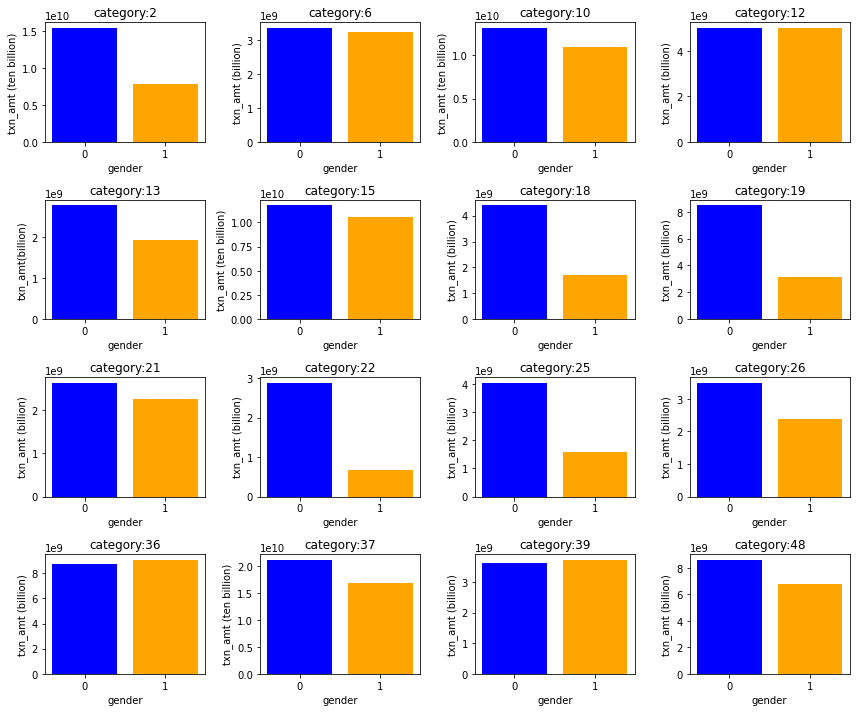

In [143]:
sex_2 = clean_data.loc[clean_data['shop_tag'] == '2']
c_man = sex_2.loc[sex_2['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_2.loc[sex_2['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.figure(figsize=(12, 10))
plt.subplot(4, 4, 1)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:2")
plt.xlabel('gender')
plt.ylabel('txn_amt (ten billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_6 = clean_data.loc[clean_data['shop_tag'] == '6']
c_man = sex_6.loc[sex_6['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_6.loc[sex_6['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 2)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:6")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()


sex_10 = clean_data.loc[clean_data['shop_tag'] == '10']
c_man = sex_10.loc[sex_10['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_10.loc[sex_10['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 3)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:10")
plt.xlabel('gender')
plt.ylabel('txn_amt (ten billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_12 = clean_data.loc[clean_data['shop_tag'] == '12']
c_man = sex_12.loc[sex_12['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_12.loc[sex_12['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 4)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:12")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_13 = clean_data.loc[clean_data['shop_tag'] == '13']
c_man = sex_13.loc[sex_13['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_13.loc[sex_13['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 5)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:13")
plt.xlabel('gender')
plt.ylabel('txn_amt(billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_15 = clean_data.loc[clean_data['shop_tag'] == '15']
c_man = sex_15.loc[sex_15['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_15.loc[sex_15['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 6)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:15")
plt.xlabel('gender')
plt.ylabel('txn_amt (ten billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_18 = clean_data.loc[clean_data['shop_tag'] == '18']
c_man = sex_18.loc[sex_18['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_18.loc[sex_18['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 7)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:18")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_19 = clean_data.loc[clean_data['shop_tag'] == '19']
c_man = sex_19.loc[sex_19['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_19.loc[sex_19['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 8)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:19")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_21 = clean_data.loc[clean_data['shop_tag'] == '21']
c_man = sex_21.loc[sex_21['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_21.loc[sex_21['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 9)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:21")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_22 = clean_data.loc[clean_data['shop_tag'] == '22']
c_man = sex_22.loc[sex_22['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_22.loc[sex_22['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 10)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:22")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_25 = clean_data.loc[clean_data['shop_tag'] == '25']
c_man = sex_25.loc[sex_25['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_25.loc[sex_25['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 11)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:25")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_26 = clean_data.loc[clean_data['shop_tag'] == '26']
c_man = sex_26.loc[sex_26['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_26.loc[sex_26['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 12)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:26")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_36 = clean_data.loc[clean_data['shop_tag'] == '36']
c_man = sex_36.loc[sex_36['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_36.loc[sex_36['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 13)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:36")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_37 = clean_data.loc[clean_data['shop_tag'] == '37']
c_man = sex_37.loc[sex_37['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_37.loc[sex_37['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 14)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:37")
plt.xlabel('gender')
plt.ylabel('txn_amt (ten billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_39 = clean_data.loc[clean_data['shop_tag'] == '39']
c_man = sex_39.loc[sex_39['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_39.loc[sex_39['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 15)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:39")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_48 = clean_data.loc[clean_data['shop_tag'] == '48']
c_man = sex_48.loc[sex_48['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_48.loc[sex_48['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 16)
plt.bar(x, height=[c_woman,c_man],color=['blue', 'orange'])
plt.title("category:48")
plt.xlabel('gender')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['0','1'])
plt.tight_layout()

plt.savefig(r"C:\Users\user\Desktop\ml & fintech/gender.png")

In [104]:
c_data['shop_tag'].value_counts(sort=True)

37    4092401
15    2573145
36    2550500
10    2234101
2     1971956
48    1806496
12    1130825
19    1022234
25     795763
6      634849
18     629407
13     625801
22     547293
39     535248
21     503873
26     476687
Name: shop_tag, dtype: int64

In [127]:
c_woman

15453241835.36239

In [128]:
c_man

7799549050.982996

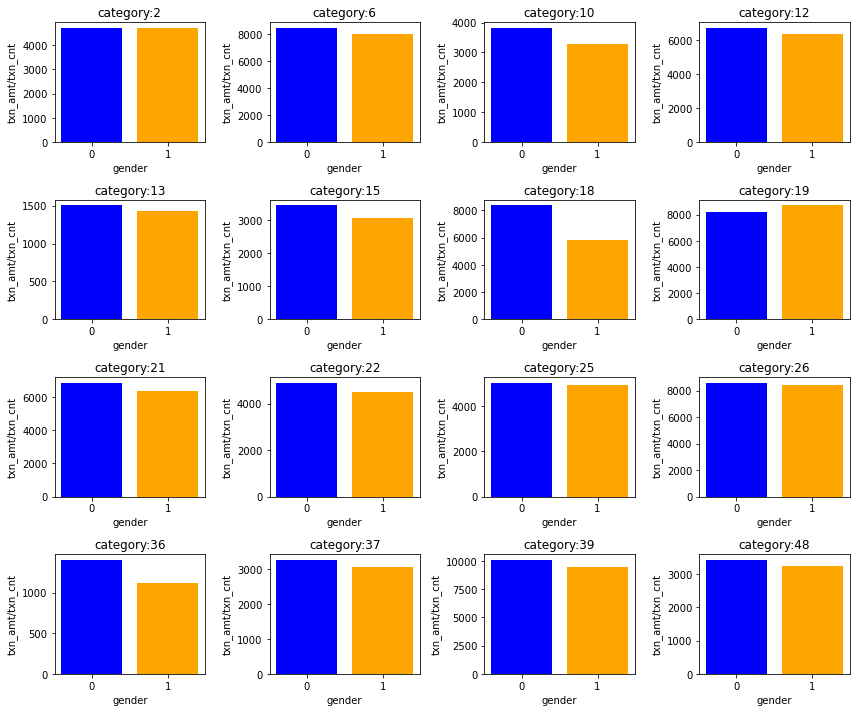

In [144]:
sex_2 = clean_data.loc[clean_data['shop_tag'] == '2']
c_man = sex_2.loc[sex_2['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_2.loc[sex_2['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_2.loc[sex_2['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_2.loc[sex_2['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.figure(figsize=(12, 10))
plt.subplot(4, 4, 1)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:2")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_6 = clean_data.loc[clean_data['shop_tag'] == '6']
c_man= sex_6.loc[sex_6['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_6.loc[sex_6['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_6.loc[sex_6['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_6.loc[sex_6['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 2)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:6")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_10 = clean_data.loc[clean_data['shop_tag'] == '10']
c_man = sex_10.loc[sex_10['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_10.loc[sex_10['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_10.loc[sex_10['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_10.loc[sex_10['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 3)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:10")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_12 = clean_data.loc[clean_data['shop_tag'] == '12']
c_man = sex_12.loc[sex_12['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_12.loc[sex_12['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_12.loc[sex_12['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_12.loc[sex_12['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 4)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:12")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_13 = clean_data.loc[clean_data['shop_tag'] == '13']
c_man = sex_13.loc[sex_13['gender_code'] == 1]['txn_amt'].sum()
c_woman= sex_13.loc[sex_13['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_13.loc[sex_13['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_13.loc[sex_13['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 5)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:13")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_15 = clean_data.loc[clean_data['shop_tag'] == '15']
c_man = sex_15.loc[sex_15['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_15.loc[sex_15['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_15.loc[sex_15['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_15.loc[sex_15['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 6)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:15")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_18 = clean_data.loc[clean_data['shop_tag'] == '18']
c_man = sex_18.loc[sex_18['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_18.loc[sex_18['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_18.loc[sex_18['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_18.loc[sex_18['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 7)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:18")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_19 = clean_data.loc[clean_data['shop_tag'] == '19']
c_man = sex_19.loc[sex_19['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_19.loc[sex_19['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_19.loc[sex_19['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_19.loc[sex_19['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 8)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:19")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_21 = clean_data.loc[clean_data['shop_tag'] == '21']
c_man = sex_21.loc[sex_21['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_21.loc[sex_21['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_21.loc[sex_21['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_21.loc[sex_21['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 9)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:21")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_22 = clean_data.loc[clean_data['shop_tag'] == '22']
c_man = sex_22.loc[sex_22['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_22.loc[sex_22['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_22.loc[sex_22['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_22.loc[sex_22['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 10)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:22")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_25= clean_data.loc[clean_data['shop_tag'] == '25']
c_man = sex_25.loc[sex_25['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_25.loc[sex_25['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_25.loc[sex_25['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_25.loc[sex_25['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 11)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:25")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_26 = clean_data.loc[clean_data['shop_tag'] == '26']
c_man = sex_26.loc[sex_26['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_26.loc[sex_26['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_26.loc[sex_26['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_26.loc[sex_26['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 12)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:26")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_36 = clean_data.loc[clean_data['shop_tag'] == '36']
c_man = sex_36.loc[sex_36['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_36.loc[sex_36['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_36.loc[sex_36['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_36.loc[sex_36['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 13)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:36")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_37 = clean_data.loc[clean_data['shop_tag'] == '37']
c_man = sex_37.loc[sex_37['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_37.loc[sex_37['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_37.loc[sex_37['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_37.loc[sex_37['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 14)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:37")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_39= clean_data.loc[clean_data['shop_tag'] == '39']
c_man = sex_39.loc[sex_39['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_39.loc[sex_39['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_39.loc[sex_39['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_39.loc[sex_39['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 15)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:39")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

sex_48 = clean_data.loc[clean_data['shop_tag'] == '48']
c_man = sex_48.loc[sex_48['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_48.loc[sex_48['gender_code'] == 0]['txn_amt'].sum()
c_man_mean_time = sex_48.loc[sex_48['gender_code'] == 1]['txn_cnt'].sum()
c_woman_mean_time = sex_48.loc[sex_48['gender_code'] == 0]['txn_cnt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 16)
plt.bar(x, height=[c_woman/c_woman_mean_time,c_man/c_man_mean_time],color=['blue', 'orange'])
plt.title("category:48")
plt.xlabel('gender')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['0','1'])
plt.tight_layout()

plt.savefig(r"C:\Users\user\Desktop\ml & fintech/gender_mean.png")

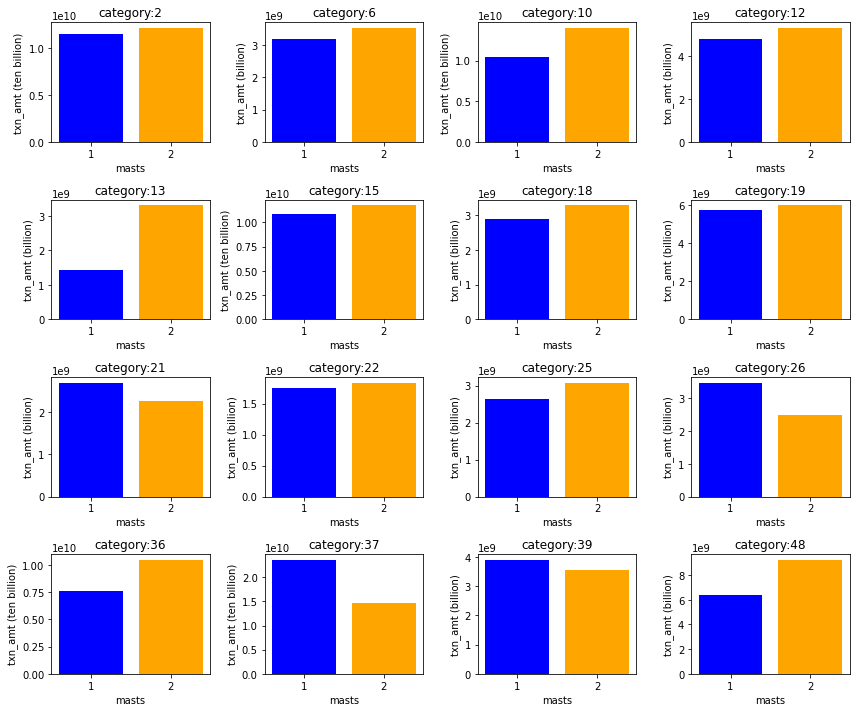

In [141]:
masts_2 =  clean_data.loc[clean_data['shop_tag'] == '2']
c_1 = masts_2.loc[masts_2['masts'] == 1]['txn_amt'].sum()
c_2 = masts_2.loc[masts_2['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.figure(figsize=(12, 10))
plt.subplot(4, 4, 1)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:2")
plt.xlabel('masts')
plt.ylabel('txn_amt (ten billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_6 =  clean_data.loc[clean_data['shop_tag'] == '6']
c_1 = masts_6.loc[masts_6['masts'] == 1]['txn_amt'].sum()
c_2 = masts_6.loc[masts_6['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 2)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:6")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()



masts_10 = clean_data.loc[clean_data['shop_tag'] == '10']
c_1 = masts_10.loc[masts_10['masts'] == 1]['txn_amt'].sum()
c_2 = masts_10.loc[masts_10['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 3)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:10")
plt.xlabel('masts')
plt.ylabel('txn_amt (ten billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()


masts_12 = clean_data.loc[clean_data['shop_tag'] == '12']
c_1 = masts_12.loc[masts_12['masts'] == 1]['txn_amt'].sum()
c_2 = masts_12.loc[masts_12['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 4)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:12")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_13 = clean_data.loc[clean_data['shop_tag'] == '13']
c_1 = masts_13.loc[masts_13['masts'] == 1]['txn_amt'].sum()
c_2 = masts_13.loc[masts_13['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 5)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:13")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_15 = clean_data.loc[clean_data['shop_tag'] == '15']
c_1 = masts_15.loc[masts_15['masts'] == 1]['txn_amt'].sum()
c_2 = masts_15.loc[masts_15['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 6)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:15")
plt.xlabel('masts')
plt.ylabel('txn_amt (ten billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_18 = clean_data.loc[clean_data['shop_tag'] == '18']
c_1 = masts_18.loc[masts_18['masts'] == 1]['txn_amt'].sum()
c_2 = masts_18.loc[masts_18['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 7)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:18")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_19 = clean_data.loc[clean_data['shop_tag'] == '19']
c_1 = masts_19.loc[masts_19['masts'] == 1]['txn_amt'].sum()
c_2 = masts_19.loc[masts_19['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 8)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:19")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_21 = clean_data.loc[clean_data['shop_tag'] == '21']
c_1 = masts_21.loc[masts_21['masts'] == 1]['txn_amt'].sum()
c_2 = masts_21.loc[masts_21['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 9)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:21")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_22 = clean_data.loc[clean_data['shop_tag'] == '22']
c_1 = masts_22.loc[masts_22['masts'] == 1]['txn_amt'].sum()
c_2 = masts_22.loc[masts_22['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 10)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:22")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_25 = clean_data.loc[clean_data['shop_tag'] == '25']
c_1 = masts_25.loc[masts_25['masts'] == 1]['txn_amt'].sum()
c_2 = masts_25.loc[masts_25['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 11)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:25")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_26 = clean_data.loc[clean_data['shop_tag'] == '26']
c_1 = masts_26.loc[masts_26['masts'] == 1]['txn_amt'].sum()
c_2 = masts_26.loc[masts_26['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 12)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:26")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_36 = clean_data.loc[clean_data['shop_tag'] == '36']
c_1 = masts_36.loc[masts_36['masts'] == 1]['txn_amt'].sum()
c_2 = masts_36.loc[masts_36['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 13)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:36")
plt.xlabel('masts')
plt.ylabel('txn_amt (ten billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_37 = clean_data.loc[clean_data['shop_tag'] == '37']
c_1 = masts_37.loc[masts_37['masts'] == 1]['txn_amt'].sum()
c_2 = masts_37.loc[masts_37['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 14)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:37")
plt.xlabel('masts')
plt.ylabel('txn_amt (ten billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_39 = clean_data.loc[clean_data['shop_tag'] == '39']
c_1 = masts_39.loc[masts_39['masts'] == 1]['txn_amt'].sum()
c_2 = masts_39.loc[masts_39['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 15)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:39")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

masts_48 = clean_data.loc[clean_data['shop_tag'] == '48']
c_1 = masts_48.loc[masts_48['masts'] == 1]['txn_amt'].sum()
c_2 = masts_48.loc[masts_48['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(4, 4, 16)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:48")
plt.xlabel('masts')
plt.ylabel('txn_amt (billion)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

plt.savefig(r"C:\Users\user\Desktop\ml & fintech/masts.png")

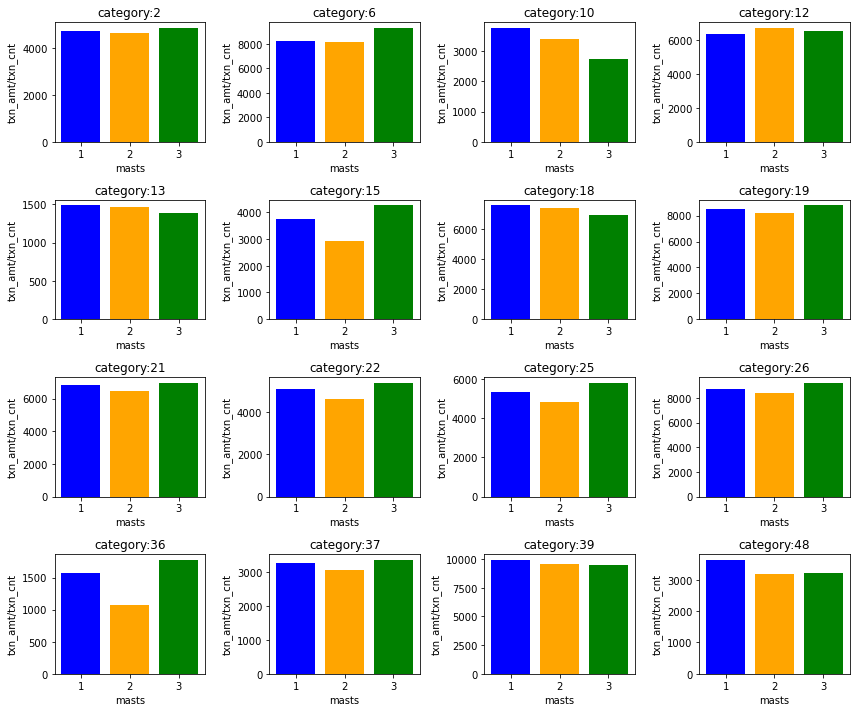

In [142]:
masts_2 = clean_data.loc[clean_data['shop_tag'] == '2']
c_1 = masts_2.loc[masts_2['masts'] == 1]['txn_amt'].sum()
c_2 = masts_2.loc[masts_2['masts'] == 2]['txn_amt'].sum()
c_3 = masts_2.loc[masts_2['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_2.loc[masts_2['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_2.loc[masts_2['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_2.loc[masts_2['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.figure(figsize=(12, 10))
plt.subplot(4, 4, 1)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:2")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_6 = clean_data.loc[clean_data['shop_tag'] == '6']
c_1 = masts_6.loc[masts_6['masts'] == 1]['txn_amt'].sum()
c_2 = masts_6.loc[masts_6['masts'] == 2]['txn_amt'].sum()
c_3 = masts_6.loc[masts_6['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_6.loc[masts_6['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_6.loc[masts_6['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_6.loc[masts_6['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 2)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:6")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()



masts_10 = clean_data.loc[clean_data['shop_tag'] == '10']
c_1 = masts_10.loc[masts_10['masts'] == 1]['txn_amt'].sum()
c_2 = masts_10.loc[masts_10['masts'] == 2]['txn_amt'].sum()
c_3 = masts_10.loc[masts_10['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_10.loc[masts_10['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_10.loc[masts_10['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_10.loc[masts_10['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 3)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:10")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()


masts_12 = clean_data.loc[clean_data['shop_tag'] == '12']
c_1 = masts_12.loc[masts_12['masts'] == 1]['txn_amt'].sum()
c_2 = masts_12.loc[masts_12['masts'] == 2]['txn_amt'].sum()
c_3 = masts_12.loc[masts_12['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_12.loc[masts_12['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_12.loc[masts_12['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_12.loc[masts_12['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 4)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:12")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_13 = clean_data.loc[clean_data['shop_tag'] == '13']
c_1 = masts_13.loc[masts_13['masts'] == 1]['txn_amt'].sum()
c_2 = masts_13.loc[masts_13['masts'] == 2]['txn_amt'].sum()
c_3 = masts_13.loc[masts_13['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_13.loc[masts_13['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_13.loc[masts_13['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_13.loc[masts_13['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 5)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:13")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_15 = clean_data.loc[clean_data['shop_tag'] == '15']
c_1 = masts_15.loc[masts_15['masts'] == 1]['txn_amt'].sum()
c_2 = masts_15.loc[masts_15['masts'] == 2]['txn_amt'].sum()
c_3 = masts_15.loc[masts_15['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_15.loc[masts_15['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_15.loc[masts_15['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_15.loc[masts_15['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 6)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:15")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_18 = clean_data.loc[clean_data['shop_tag'] == '18']
c_1 = masts_18.loc[masts_18['masts'] == 1]['txn_amt'].sum()
c_2 = masts_18.loc[masts_18['masts'] == 2]['txn_amt'].sum()
c_3 = masts_18.loc[masts_18['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_18.loc[masts_18['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_18.loc[masts_18['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_18.loc[masts_18['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 7)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:18")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_19 = clean_data.loc[clean_data['shop_tag'] == '19']
c_1 = masts_19.loc[masts_19['masts'] == 1]['txn_amt'].sum()
c_2 = masts_19.loc[masts_19['masts'] == 2]['txn_amt'].sum()
c_3 = masts_19.loc[masts_19['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_19.loc[masts_19['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_19.loc[masts_19['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_19.loc[masts_19['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 8)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:19")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_21= clean_data.loc[clean_data['shop_tag'] == '21']
c_1 = masts_21.loc[masts_21['masts'] == 1]['txn_amt'].sum()
c_2 = masts_21.loc[masts_21['masts'] == 2]['txn_amt'].sum()
c_3 = masts_21.loc[masts_21['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_21.loc[masts_21['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_21.loc[masts_21['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_21.loc[masts_21['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 9)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:21")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_22 = clean_data.loc[clean_data['shop_tag'] == '22']
c_1 = masts_22.loc[masts_22['masts'] == 1]['txn_amt'].sum()
c_2 = masts_22.loc[masts_22['masts'] == 2]['txn_amt'].sum()
c_3 = masts_22.loc[masts_22['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_22.loc[masts_22['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_22.loc[masts_22['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_22.loc[masts_22['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 10)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:22")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_25 = clean_data.loc[clean_data['shop_tag'] == '25']
c_1 = masts_25.loc[masts_25['masts'] == 1]['txn_amt'].sum()
c_2 = masts_25.loc[masts_25['masts'] == 2]['txn_amt'].sum()
c_3 = masts_25.loc[masts_25['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_25.loc[masts_25['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_25.loc[masts_25['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_25.loc[masts_25['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 11)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:25")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_26 = clean_data.loc[clean_data['shop_tag'] == '26']
c_1 = masts_26.loc[masts_26['masts'] == 1]['txn_amt'].sum()
c_2 = masts_26.loc[masts_26['masts'] == 2]['txn_amt'].sum()
c_3 = masts_26.loc[masts_26['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_26.loc[masts_26['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_26.loc[masts_26['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_26.loc[masts_26['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 12)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:26")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_36 = clean_data.loc[clean_data['shop_tag'] == '36']
c_1 = masts_36.loc[masts_36['masts'] == 1]['txn_amt'].sum()
c_2 = masts_36.loc[masts_36['masts'] == 2]['txn_amt'].sum()
c_3 = masts_36.loc[masts_36['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_36.loc[masts_36['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_36.loc[masts_36['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_36.loc[masts_36['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 13)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:36")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_37 = clean_data.loc[clean_data['shop_tag'] == '37']
c_1 = masts_37.loc[masts_37['masts'] == 1]['txn_amt'].sum()
c_2 = masts_37.loc[masts_37['masts'] == 2]['txn_amt'].sum()
c_3 = masts_37.loc[masts_37['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_37.loc[masts_37['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_37.loc[masts_37['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_37.loc[masts_37['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 14)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:37")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_39 = clean_data.loc[clean_data['shop_tag'] == '39']
c_1 = masts_39.loc[masts_39['masts'] == 1]['txn_amt'].sum()
c_2 = masts_39.loc[masts_39['masts'] == 2]['txn_amt'].sum()
c_3 = masts_39.loc[masts_39['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_39.loc[masts_39['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_39.loc[masts_39['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_39.loc[masts_39['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 15)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:39")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

masts_48 = clean_data.loc[clean_data['shop_tag'] == '48']
c_1 = masts_48.loc[masts_48['masts'] == 1]['txn_amt'].sum()
c_2 = masts_48.loc[masts_48['masts'] == 2]['txn_amt'].sum()
c_3 = masts_48.loc[masts_48['masts'] == 3]['txn_amt'].sum()
c_1_mean_time = masts_48.loc[masts_48['masts'] == 1]['txn_cnt'].sum()
c_2_mean_time = masts_48.loc[masts_48['masts'] == 2]['txn_cnt'].sum()
c_3_mean_time = masts_48.loc[masts_48['masts'] == 3]['txn_cnt'].sum()
x = np.arange(3)
plt.subplot(4, 4, 16)
plt.bar(x, height=[c_1/c_1_mean_time,c_2/c_2_mean_time,c_3/c_3_mean_time],color=['blue', 'orange', 'green'])
plt.title("category:48")
plt.xlabel('masts')
plt.ylabel('txn_amt/txn_cnt')
plt.xticks(x, ['1','2','3'])
plt.tight_layout()

plt.savefig(r"C:\Users\user\Desktop\ml & fintech/masts_mean.png")

In [23]:
data.isnull().any()

dt                          False
chid                        False
shop_tag                    False
txn_cnt                     False
txn_amt                     False
domestic_offline_cnt        False
domestic_online_cnt         False
overseas_offline_cnt        False
overseas_online_cnt         False
domestic_offline_amt_pct    False
domestic_online_amt_pct     False
overseas_offline_amt_pct    False
overseas_online_amt_pct     False
card_1_txn_cnt              False
card_2_txn_cnt              False
card_3_txn_cnt              False
card_4_txn_cnt              False
card_5_txn_cnt              False
card_6_txn_cnt              False
card_7_txn_cnt              False
card_8_txn_cnt              False
card_9_txn_cnt              False
card_10_txn_cnt             False
card_11_txn_cnt             False
card_12_txn_cnt             False
card_13_txn_cnt             False
card_14_txn_cnt             False
card_other_txn_cnt          False
card_1_txn_amt_pct          False
card_2_txn_amt

In [138]:
clean_data.isnull().sum()

dt                                0
chid                              0
shop_tag                          0
txn_cnt                           0
txn_amt                           0
domestic_offline_cnt              0
domestic_online_cnt               0
overseas_offline_cnt              0
overseas_online_cnt               0
domestic_offline_amt_pct          0
domestic_online_amt_pct           0
overseas_offline_amt_pct          0
overseas_online_amt_pct           0
card_1_txn_cnt                    0
card_2_txn_cnt                    0
card_3_txn_cnt                    0
card_4_txn_cnt                    0
card_5_txn_cnt                    0
card_6_txn_cnt                    0
card_7_txn_cnt                    0
card_8_txn_cnt                    0
card_9_txn_cnt                    0
card_10_txn_cnt                   0
card_11_txn_cnt                   0
card_12_txn_cnt                   0
card_13_txn_cnt                   0
card_14_txn_cnt                   0
card_other_txn_cnt          

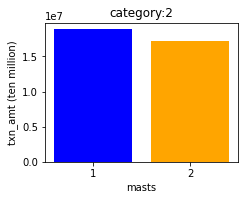

In [13]:
masts_2 = t_data.loc[t_data['shop_tag'] == '2']
c_1 = masts_2.loc[masts_2['masts'] == 1]['txn_amt'].sum()
c_2 = masts_2.loc[masts_2['masts'] == 2]['txn_amt'].sum()
x = np.arange(2)
plt.figure(figsize=(12, 10))
plt.subplot(4, 4, 1)
plt.bar(x, height=[c_1,c_2],color=['blue', 'orange'])
plt.title("category:2")
plt.xlabel('masts')
plt.ylabel('txn_amt (ten million)')
plt.xticks(x, ['1','2'])
plt.tight_layout()

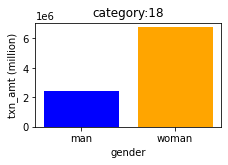

In [14]:
sex_18 = t_data.loc[t_data['shop_tag'] == '18']
c_man = sex_18.loc[sex_18['gender_code'] == 1]['txn_amt'].sum()
c_woman = sex_18.loc[sex_18['gender_code'] == 0]['txn_amt'].sum()
x = np.arange(2)
plt.subplot(2, 2, 3)
plt.bar(x, height=[c_man,c_woman],color=['blue', 'orange'])
plt.title("category:18")
plt.xlabel('gender')
plt.ylabel('txn_amt (million)')
plt.xticks(x, ['man','woman'])
plt.tight_layout()